<a href="https://colab.research.google.com/github/Anova07/CPP-Questions-and-Solutions/blob/main/WMLab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 3

Steps:

1.   Pre-processing of the Dataset
2.   Feature Extraction with TF-IDF
3.   Running K-Means and Cluster Analysis
4.   Clusters Visuzalisation in a Map with Folium

In [3]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
#Reading the excel file
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [5]:
data = pd.read_csv("Mall_Customers.csv")

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

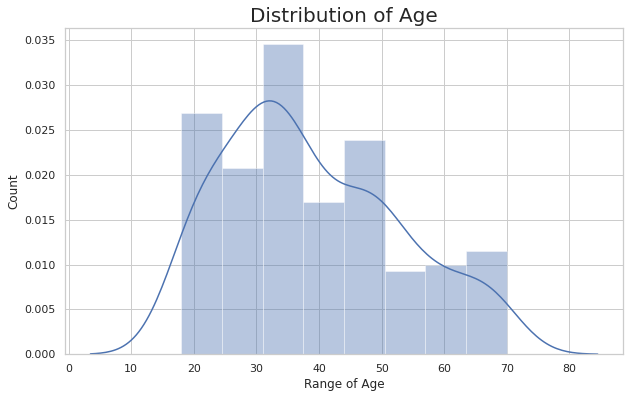

In [8]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

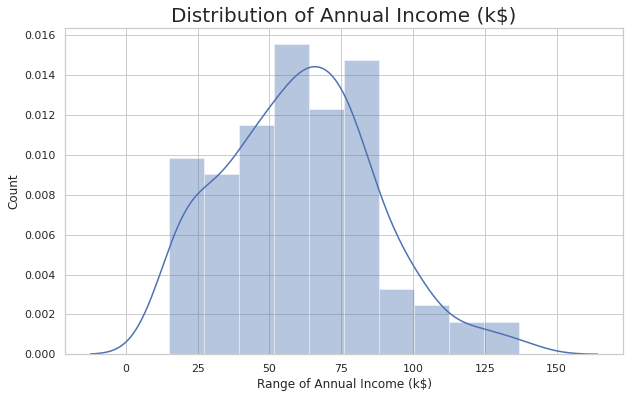

In [9]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Clustering based on 2 features

In [10]:
#We take just the Annual Income and Age
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Age"]]


In [11]:
#The input data
X.head()

,Annual Income (k$),Age
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31


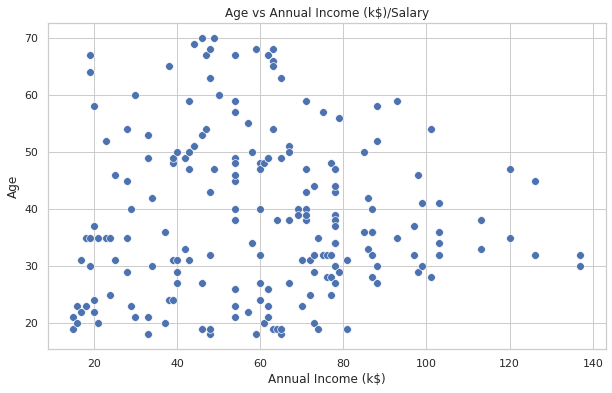

In [12]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Age',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age') 
plt.title('Age vs Annual Income (k$)/Salary')
plt.show()

In [13]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

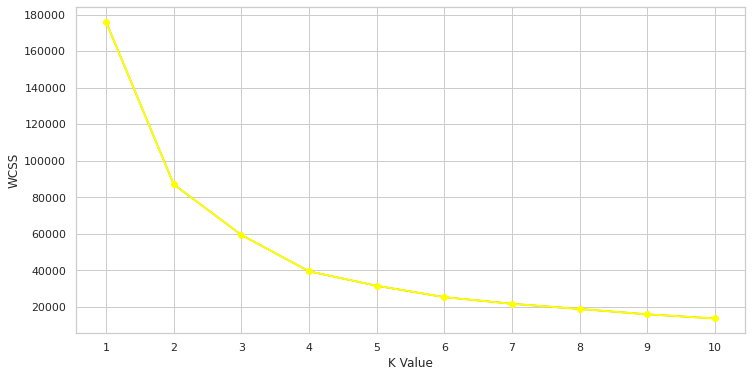

In [15]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="yellow", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [16]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


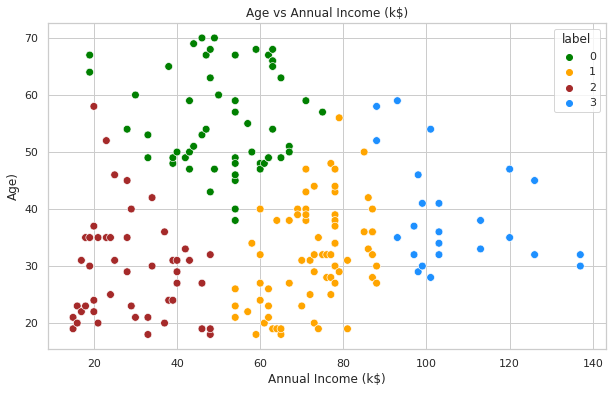

In [17]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Age',hue="label",  
                 palette=['green','orange','brown','dodgerblue'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age)') 
plt.title('Age vs Annual Income (k$)')
plt.show()

QUESTION 1

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
documents = ["The sun is the largest celestial body in the solar system",
            "The solar system consists of the sun and eight revolving planets",
             "Ra was the Egyptian Sun God",
             "The Pyramids were the pinnacle of Egyptian architecture",
             "lazy dog and a smart cat",
             "I want to start learning to charge something in life",
             "reading something about life no one else knows",
             "Never stop learning",
             "It’s a lazy day and i have a dog",
             "Solar System is the gravitationally bound system of the Sun",
             "most of the solar system's mass is in the Sun itself",
             "Venus is Earth's twin because Venus and Earth same size",
             "Sun is a solitary star",
             "dog might be your best pet",
             "Cats and dogs have a range of interactions."]


vectorizer = TfidfVectorizer(stop_words = 'english')
data = vectorizer.fit_transform(documents)


true_k = 2
clustering_model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 300, n_init = 10)
clustering_model.fit(data)
print("Top terms per cluster:")

sorted_centroids = clustering_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
  print("Cluster %d:" % i, end='')
  for ind in sorted_centroids[i, :10]:
    print(' %s \n' % terms[ind], end='')
    print()

print()



Top terms per cluster:
Cluster 0: dog 

 learning 

 lazy 

 life 

 stop 

 day 

 earth 

 venus 

 best 

 pet 

Cluster 1: sun 

 solar 

 mass 

 star 

 solitary 

 gravitationally 

 bound 

 god 

 ra 

 largest 




QUESTION 2

In [23]:
print("Predictions of new documents")
new_doc = ["learning through reading is best"]
Y = vectorizer.transform(new_doc)
prediction = clustering_model.predict(Y)
print("for new document 1: ",prediction)
new_doc = ["sun and solar"]
Y = vectorizer.transform(new_doc)
prediction = clustering_model.predict(Y)
print("for new document 2: ",prediction)
new_doc = ["dog is a pet animal"]
Y = vectorizer.transform(new_doc)
prediction = clustering_model.predict(Y)
print("for new document 3: ",prediction)
print()

Predictions of new documents
for new document 1:  [0]
for new document 2:  [1]
for new document 3:  [0]

